In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('/Users/dylanbai/Desktop/Data Science/Assignments/sales_data.csv')

In [4]:
df  # although some datas of 'Sale Date' are future times, the task hasn't demonstrate the present time so i'm gonna consider the sale dates are all useful.

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


In [5]:
df.describe()

,Price,Units Sold
count,945.000000,946.000000
mean,107.598688,10.048626
std,124.020322,3.172261
min,0.200000,2.000000
25%,29.430000,8.000000
50%,78.130000,10.000000
75%,142.570000,12.000000
max,2143.300000,22.000000


In [6]:
df.info() #it seems that the data has some missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [7]:
df['Price'].fillna(df['Price'].mean(),inplace=True)
df['Units Sold'].fillna(df['Units Sold'].mean(),inplace=True)
# Fill in the NaN with the mean value of Price & Units Sold.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       1050 non-null   float64
 3   Units Sold  1050 non-null   float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [9]:
df=df.dropna() # prefer dropping the missing data of Product & Region to filling with 0  

In [10]:
df.drop_duplicates(inplace=True)

/var/folders/xg/p7xsrph1757b22c90718xp3m0000gn/T/ipykernel_5220/3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 810 entries, 2 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     810 non-null    object 
 1   Region      810 non-null    object 
 2   Price       810 non-null    float64
 3   Units Sold  810 non-null    float64
 4   Sale Date   810 non-null    object 
dtypes: float64(2), object(3)
memory usage: 38.0+ KB


In [12]:
df.describe()

,Price,Units Sold
count,810.000000,810.000000
mean,107.011208,10.098570
std,122.268623,3.067497
min,0.200000,2.000000
25%,33.805000,8.000000
50%,87.775000,10.000000
75%,129.317500,12.000000
max,2143.300000,22.000000


In [13]:
df=df[(df['Price']>0)] #to make sure the 'Price' are all meaningful.

In [14]:
df.index

Index([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
       ...
       980, 981, 982, 984, 985, 988, 993, 994, 998, 999],
      dtype='int64', length=810)

In [15]:
df.columns

Index(['Product', 'Region', 'Price', 'Units Sold', 'Sale Date'], dtype='object')

In [16]:
df.axes

[Index([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        ...
        980, 981, 982, 984, 985, 988, 993, 994, 998, 999],
       dtype='int64', length=810),
 Index(['Product', 'Region', 'Price', 'Units Sold', 'Sale Date'], dtype='object')]

In [17]:
df.dtypes

Product        object
Region         object
Price         float64
Units Sold    float64
Sale Date      object
dtype: object

In [18]:
df

,Product,Region,Price,Units Sold,Sale Date
2,Product_46,Region_3,20.43,12.000000,2022-01-03
3,Product_36,Region_1,12.77,10.000000,2022-01-04
4,Product_17,Region_6,125.69,6.000000,2022-01-05
5,Product_45,Region_1,8.63,11.000000,2022-01-06
6,Product_31,Region_3,23.73,6.000000,2022-01-07
...,...,...,...,...,...
988,Product_42,Region_9,240.97,10.048626,2024-09-15
993,Product_7,Region_9,128.51,17.000000,2024-09-20
994,Product_1,Region_4,95.24,7.000000,2024-09-21
998,Product_2,Region_10,43.44,15.000000,2024-09-25


In [19]:
df_grouped_region=df.groupby('Region')['Units Sold'].agg([sum,min,max])

In [20]:
df_grouped_region 
# create a new dataframe contains the 'units sold' information of different regions.

,sum,min,max
Region,,,
Region_1,745.243129,2.0,18.0
Region_10,905.389006,4.0,16.0
Region_2,724.194503,2.0,18.0
Region_3,807.340381,2.0,19.0
Region_4,905.243129,4.0,22.0
Region_5,850.486258,2.0,20.0
Region_6,770.389006,3.0,18.0
Region_7,637.486258,3.0,19.0
Region_8,853.632135,4.0,19.0


In [21]:
df_grouped_region.sort_values('sum', ascending=False).head()
# To see which regions have the top sales of products.

,sum,min,max
Region,,,
Region_9,980.437632,3.0,17.0
Region_10,905.389006,4.0,16.0
Region_4,905.243129,4.0,22.0
Region_8,853.632135,4.0,19.0
Region_5,850.486258,2.0,20.0


In [22]:
df_grouped_product=df.groupby('Product')['Units Sold'].agg([sum,min,max])

In [23]:
df_grouped_product

,sum,min,max
Product,,,
Product_1,187.000000,7.0,16.0
Product_10,159.048626,3.0,17.0
Product_11,110.145877,8.0,14.0
Product_12,112.000000,7.0,13.0
Product_13,253.097252,2.0,19.0
Product_14,169.097252,5.0,19.0
Product_15,182.048626,5.0,14.0
Product_16,185.000000,5.0,18.0
Product_17,177.048626,5.0,15.0


In [24]:
df_grouped_product.sort_values('sum', ascending=False).head()
# To see which product is sold most.

,sum,min,max
Product,,,
Product_5,260.291755,2.0,20.0
Product_13,253.097252,2.0,19.0
Product_50,241.097252,7.0,22.0
Product_4,237.048626,6.0,16.0
Product_43,220.048626,4.0,16.0


In [25]:
df[df['Region']=='Region_1'].sort_values(['Units Sold'],ascending=False).head()
# To see which product is sold most in Region_1

,Product,Region,Price,Units Sold,Sale Date
568,Product_42,Region_1,9.720000,18.0,2023-07-23
162,Product_2,Region_1,102.290000,17.0,2022-06-12
922,Product_20,Region_1,241.390000,17.0,2024-07-11
795,Product_7,Region_1,107.598688,17.0,2024-03-06
563,Product_1,Region_1,51.910000,16.0,2023-07-18


In [26]:
df[df['Region']=='Region_2'].sort_values(['Units Sold'],ascending=False).head()
# To se which product is sold most in Region_2

,Product,Region,Price,Units Sold,Sale Date
796,Product_16,Region_2,272.83,18.0,2024-03-07
14,Product_3,Region_2,13.77,17.0,2022-01-15
23,Product_50,Region_2,249.30,16.0,2022-01-24
47,Product_10,Region_2,58.50,16.0,2022-02-17
225,Product_3,Region_2,97.21,16.0,2022-08-14


In [27]:
df[df['Region']=='Region_3'].sort_values(['Units Sold'],ascending=False).head()
# To se which product is sold most in Region_3

,Product,Region,Price,Units Sold,Sale Date
232,Product_14,Region_3,104.270000,19.0,2022-08-21
678,Product_9,Region_3,107.598688,18.0,2023-11-10
390,Product_41,Region_3,107.598688,18.0,2023-01-26
599,Product_10,Region_3,107.598688,17.0,2023-08-23
105,Product_35,Region_3,6.260000,15.0,2022-04-16


In [28]:
df[df['Region']=='Region_4'].sort_values(['Units Sold'],ascending=False).head()
# To se which product is sold most in Region_4

,Product,Region,Price,Units Sold,Sale Date
719,Product_50,Region_4,86.73,22.0,2023-12-21
527,Product_30,Region_4,100.80,16.0,2023-06-12
754,Product_10,Region_4,6.35,16.0,2024-01-25
271,Product_35,Region_4,55.12,15.0,2022-09-29
17,Product_17,Region_4,95.78,15.0,2022-01-18


In [29]:
df[df['Region']=='Region_5'].sort_values(['Units Sold'],ascending=False).head()
# To se which product is sold most in Region_5

,Product,Region,Price,Units Sold,Sale Date
221,Product_5,Region_5,50.360000,20.0,2022-08-10
909,Product_21,Region_5,46.990000,17.0,2024-06-28
854,Product_9,Region_5,55.170000,16.0,2024-05-04
407,Product_1,Region_5,78.940000,16.0,2023-02-12
883,Product_27,Region_5,107.598688,16.0,2024-06-02


In [30]:
df[df['Region']=='Region_6'].sort_values(['Units Sold'],ascending=False).head()
# To se which product is sold most in Region_6

,Product,Region,Price,Units Sold,Sale Date
167,Product_28,Region_6,107.598688,18.0,2022-06-17
805,Product_8,Region_6,97.300000,17.0,2024-03-16
191,Product_41,Region_6,133.130000,16.0,2022-07-11
867,Product_43,Region_6,50.880000,16.0,2024-05-17
954,Product_13,Region_6,34.860000,15.0,2024-08-12


In [31]:
df[df['Region']=='Region_7'].sort_values(['Units Sold'],ascending=False).head()
# To se which product is sold most in Region_7

,Product,Region,Price,Units Sold,Sale Date
962,Product_13,Region_7,0.610000,19.0,2024-08-20
370,Product_44,Region_7,107.598688,17.0,2023-01-06
342,Product_24,Region_7,177.750000,16.0,2022-12-09
652,Product_19,Region_7,59.370000,15.0,2023-10-15
404,Product_23,Region_7,15.860000,15.0,2023-02-09


In [32]:
df[df['Region']=='Region_8'].sort_values(['Units Sold'],ascending=False).head()
# To se which product is sold most in Region_8

,Product,Region,Price,Units Sold,Sale Date
912,Product_22,Region_8,107.598688,19.0,2024-07-01
565,Product_25,Region_8,208.940000,16.0,2023-07-20
540,Product_33,Region_8,107.598688,14.0,2023-06-25
552,Product_15,Region_8,94.300000,14.0,2023-07-07
276,Product_48,Region_8,418.240000,14.0,2022-10-04


In [33]:
df[df['Region']=='Region_9'].sort_values(['Units Sold'],ascending=False).head()
# To se which product is sold most in Region_9

,Product,Region,Price,Units Sold,Sale Date
993,Product_7,Region_9,128.51,17.0,2024-09-20
974,Product_31,Region_9,29.92,17.0,2024-09-01
950,Product_40,Region_9,86.33,17.0,2024-08-08
955,Product_6,Region_9,14.36,16.0,2024-08-13
873,Product_24,Region_9,75.51,16.0,2024-05-23


In [34]:
df['Total_Income']=df['Price']*df['Units Sold']
# add a new column to calculate the total income of products.

In [35]:
df.sort_values(['Total_Income'],ascending=False)
# To see which region has the most total amount of income by selling which product.

,Product,Region,Price,Units Sold,Sale Date,Total_Income
969,Product_15,Region_8,2143.30,5.0,2024-08-27,10716.50
437,Product_26,Region_8,585.17,13.0,2023-03-14,7607.21
814,Product_26,Region_2,623.60,12.0,2024-03-25,7483.20
853,Product_41,Region_1,713.29,10.0,2024-05-03,7132.90
728,Product_31,Region_3,665.00,9.0,2023-12-30,5985.00
...,...,...,...,...,...,...
132,Product_39,Region_5,0.37,13.0,2022-05-13,4.81
456,Product_26,Region_4,0.20,14.0,2023-04-02,2.80
347,Product_9,Region_5,0.31,9.0,2022-12-14,2.79
201,Product_24,Region_4,0.22,10.0,2022-07-21,2.20


<Axes: xlabel='Region', ylabel='Total_Income'>

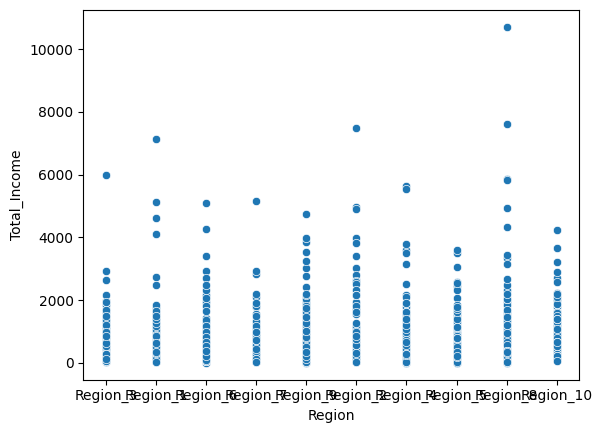

In [39]:
import seaborn as sns
sns.scatterplot(data=df,x='Region',y='Total_Income')

In [37]:
# Conclusions can be drawn from the data:
# ( Despite those sale dates of the future time because the period of the sales has not been specifically defined. )
# 1.Region_9 has  the highest sales volume of products, with 863 pieces;
# 2.Product_31 sells the most, with 209 pieces;
# 3.Different region seems to has different kind of popular product，by calculating the highest sale volume of different product.
# 4.The top 2 sales revenues are in Region_8 with Product_15 and Product_26.
# Recommmendations:
# 1.Focus on promoting the top-selling products in each region to maximize sales potential.
# 2.Allocate more resources and marketing efforts in the regions with the highest sales revenues.
# 3.Improve the quality or offer a better price of the product which has the maximum sale to further trigger customers' desire.
# Data Cleaning Approach:
# 1.handling the missing values;2.dropping duplicates;3. check the data types to make sure all columns has the correct types.
